# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Determining the Top Japanese Restaurants in Toronto using K-means clustering algorithm

### by Hoo Chee Hau

#### 4 MAY 2020

####  NOTE: FOR RENDERING AND DISPLAYING FOLIUM MAPS GENERATED IN THIS JUPYTER NOTEBOOK, PLEASE COPY AND PASTE THIS GITHUB LINK AT https://nbviewer.jupyter.org

## Table of Contents

* [1.0 Introduction](#introduction)
* [2.0 Data Acquistion and Cleaning](#data)
* [3.0 Methodology](#methodology)
* [4.0 Results](#results)
* [5.0 Discussion](#discussion)
* [6.0 Conclusion](#conclusion)

## 1.0 Introduction <a name="introduction"></a>

### 1.1 Background

Toronto is by far the largest city in Canada with a population of 2,731,571, based on 2016 census conducted by Statistics Canada, which has seen an increase of 4.5% in population growth since 2011. Being a provincial capital of Ontario, Toronto is geographically located on the north-western shore of Lake Ontario.

Major districts in Toronto include Downtown, Central, East, West and North Toronto that are used to be those of the Old Toronto, and the result of amalgamation and expansion has seen inclusion of surrounding districts, such as East York, Etobicoke, North York, York, and Scarborough. Toronto Pearson International Airport is located at Mississauga, a suburban municipality adjacent to Etobicoke.

The city of Toronto is considered as an important international business and financial center in Canada where its economic strength is underscored by the Toronto Stock Exchange, the 7th largest stock exchange bourse in the world by market capitalization. 

Toronto is home to a sizeable minority groups of diverse ethnic origins stemmed from active immigration from different parts of the world since 1980s with more than 150 different languages spoken and therefore, this city is recognized as one of the most cosmopolitan and vibrant cities in North America. 

According to an article written by Corey Mintz in Globe and Mail dated 3 January 2020, Japanese cuisine has blossomed in cosmopolitan Toronto since 2012, picking up the trend from Vancouver, where Japanese businesses have been flourishing and expanding to Toronto, taking advantage of its bigger market. In recent years, Toronto has seen Japanese izakaya groups such as Guu and Kingyo set up business, with former employees breaking off to open places such as Imanishi and Ramen Ishin.


### 1.2 Business Problem

This study focussed primarily on the needs of a specific target group, namely - **business travellers**, **tourists** and **short-term visitors** to Toronto who are not familiar with the city and are looking for general recommendations on Japanese restaurants to dine-in.

Hence, the objective of this study was to provide reliable and well-researched information in addressing the requirements of the aforementioned target group outlined as below:-
    
a.	List of Japanese restaurants in Toronto.

b.	Boroughs in Toronto that have a significant presence of Japanese restaurants and the borough that has the highest number of Japanese restaurants.

c.	Ranking of the Japanese restaurants in Toronto based on customers’ sentiments.

d.	Recommendation on the top 3 Japanese restaurants in Toronto.

By and large, this study endeavored a novel approach of applying data science and machine learning techniques, which is the showcase of this capstone project, to achieve its objective. 


## 2.0 Data acquisition and cleaning <a name="data"></a>

In this section, the description on how the data was acquired, with the source of data from where it was obtained and how the data was cleansed, is elaborated in detail.

### 2.1 Import the required Python libraries for project initialization

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means for clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


###  2.2 Webscraping Wikipedia website containing Toronto postal code FSA and converting the table to Pandas dataframe

Toronto’s FSA (Forward Sortation Area)  3-letter codes table webscraped from Wikipedia’s webpage titled - ‘List of postal codes of Canada: M’ with the URL given as:- 
#### https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M

In [2]:
import requests

from bs4 import BeautifulSoup

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighborhood_r=pd.DataFrame(df[0])
neighborhood_r

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


In [3]:
neighborhood_r.shape

(180, 3)

This dataframe contains 180 rows and 3 columns.

### 2.3 Data check and cleaning

Several issues were found during the initial inspection of the data as described below:-
    
a.	There are a number of rows containing ‘Not assigned’ for Boroughs and ‘NaN’ for Neighborhood which have to be dropped 

b.	Several neighborhood names in Neighborhood have delimiters of ‘/’ and have to be replaced with ‘,’.


#### Remove 'Not assigned' records

In [4]:
# remove 'Not assigned' records
neighborhood_i = neighborhood_r[neighborhood_r['Borough'] != 'Not assigned'].reset_index(drop=True)
neighborhood_i


,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,Malvern / Rouge
7,M3B,North York,Don Mills
8,M4B,East York,Parkview Hill / Woodbine Gardens
9,M5B,Downtown Toronto,Garden District / Ryerson


#### Replace '/' with ',' in Neighborhood column

In [5]:
# replace '/' with ',' in Neighborhood column

neighborhood = neighborhood_i.replace({'/': ','}, regex=True)
neighborhood

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District , Ryerson"


In [6]:
neighborhood.shape

(103, 3)

This dataframe which has been cleaned up has 103 rows and 3 columns.

### 2.4 Assigning Latitude & Longitude coordinates to each Neighborhood in the dataframe

The geographical coordinates in Longitude and Latitude corresponding to Toronto’s postal code FSA are downloaded from : http://cocl.us/Geospatial_data in comma delimited text format.

In [7]:
#Load csv file that has the geographical coordinates of each postal code from : http://cocl.us/Geospatial_data

geodata_csv = 'http://cocl.us/Geospatial_data'
geodata_df=pd.read_csv(geodata_csv)
geodata_df.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [8]:
geodata_df.shape

(103, 3)

This dataframe has 103 rows and 3 columns.

#### Save Toronto Geospatial Data to csv format and re-reading it back

In [9]:
geodata_df.to_csv('Toronto_geospatial_data.csv', index=False)

In [10]:
#readback csv file for QC purpose
geodata_df_import=pd.read_csv('Toronto_geospatial_data.csv')

In [11]:
geodata_df_import.shape

(103, 3)

Data Check: This dataframe has 103 rows and 3 columns.

### 2.5 Merge the 2 dataframes

The two dataframes are merged to create a new expanded dataframe that contains columns as the following: Postcode, Borough, Neighborhood, Longitude & Latitude.
    The process is described below.

#### Rename column "Postal code" to "Postal Code" in neighborhood dataframe to be consistent with that of geodata

In [12]:
#rename column "Postal code" to "Postal Code" in neighborhood dataframe to be consistent with that of geodata
neighborhood.rename(columns={'Postal code':'Postal Code'},inplace=True)
neighborhood.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


#### Rename 'Postal Code' column in both dataframes to 'Postcode' for the purpose of joining 2 dataframes with common column name

In [13]:
#rename 'Postal Code' column in both dataframes to 'Postcode' for the purpose of  joining 2 dataframes with common column name
neighborhood.rename(columns={'Postal Code':'Postcode'},inplace=True)
geodata_df.rename(columns={'Postal Code':'Postcode'},inplace=True)

#### Join neighborhood dataframe with geodata dataframe with common column name 'Postcode'

In [14]:
#join neighborhood dataframe with geodata dataframe with common column name 'Postcode'
ngeod = pd.merge(neighborhood, geodata_df, on='Postcode')
ngeod.head(10)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937


In [15]:
ngeod.shape

(103, 5)

Data Check: This dataframe has 103 rows and 5 columns.

#### Determine the number of boroughs and neighborhoods in Toronto from this dataframe

In [16]:
print('This dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ngeod['Borough'].unique()),
        ngeod.shape[0]
    )
)

This dataframe has 10 boroughs and 103 neighborhoods.


## 3.0 Methodology <a name="methodology"></a>

### 3.1 Exploratory Data Analysis

### 3.1.1 Map visualization

The 103 neighborhoods with the corresponding latitudes and longitudes from the merged dataframe are overlain on Toronto map created from python folium library for visualization.

#### Geographical Data (longitude and latitude) for Toronto from geopy

In [17]:
#getting geographical data (longitude and latitude) for Toronto from geopy

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top for visualization purpose

In [18]:
#create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ngeod['Latitude'], ngeod['Longitude'], ngeod['Borough'], ngeod['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
       radius=5,
        popup=label,
       color='blue',
       fill=True,
       fill_color='#3186cc',
        fill_opacity=0.5,
        ).add_to(map_toronto)  
    
map_toronto

### 3.2 Analysis on Boroughs and Neighborhoods of Toronto

#### Perform Neighborhood Count for each Borough

Boroughs that have the highest number of neighborhoods are determined and sorted in descending order.

In [19]:
neighborhood_count=ngeod.groupby('Borough')['Neighborhood'].count() \
         .reset_index(name='Neighborhood Count') \
         .sort_values(['Neighborhood Count'], ascending=False)
neighborhood_count

,Borough,Neighborhood Count
6,North York,24
1,Downtown Toronto,19
7,Scarborough,17
4,Etobicoke,12
0,Central Toronto,9
8,West Toronto,6
2,East Toronto,5
3,East York,5
9,York,5
5,Mississauga,1


#### Number of neighborhoods for each Borough in Toronto represented by a bar chart

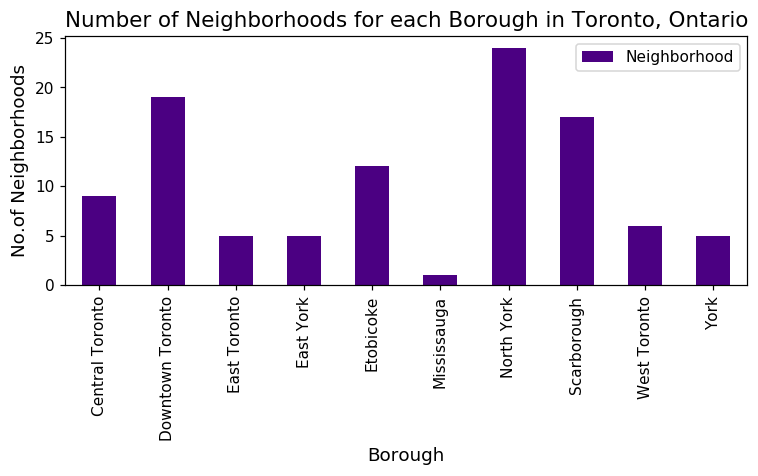

In [21]:
import matplotlib.pyplot as plt
# column chart 
plt.figure(figsize=(8,3), dpi = 110)
# title
plt.title('Number of Neighborhoods for each Borough in Toronto, Ontario', fontsize=14)
#label x-axis
plt.xlabel('Borough', fontsize = 12)
#label  y-axis
plt.ylabel('No.of Neighborhoods', fontsize=12)
#bar plot
ngeod.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='indigo')
#legend
plt.legend()
#displays the plot
plt.show()

#### Percentage of Total Number of Neighborhoods for Boroughs in Toronto represented by a pie chart

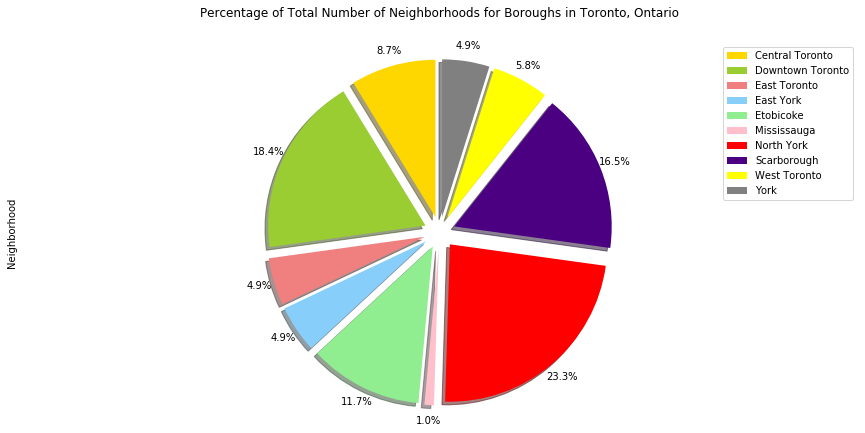

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'indigo', 'yellow','grey']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1] # ratio for each continent with which to offset each wedge.

ngeod.groupby('Borough')['Neighborhood'].count().plot(kind='pie',
                            figsize=(15, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Percentage of Total Number of Neighborhoods for Boroughs in Toronto, Ontario', y=1.05) 
plt.axis('equal')

# add legend
groupby_borough=ngeod.groupby('Borough')['Neighborhood'].count()
plt.legend(labels=groupby_borough.index, loc='upper right') 

plt.show()

North York has the highest neighborhood count (24), followed by Downtown Toronto (19), and Scarborough (17). In terms of percentage, North York accounts for 23.3%, Downtown Toronto 18.4% while Scarborough 16.5%.

### 3.3 Venues search using Foursquare API

Foursquare API (https://api.foursquare.com/v2/) is utilized extensively to perform venues search and to retrieve the name and id of the respective Japanese restaurants in each neighborhood based on its geographical coordinates in longitude and latitude. Foursquare is a popular social location service that requires login authentication.

The search radius is set to 1 km, a reasonable distance to have a fairly good area coverage with not too much of an overlap especially in neighborhoods such as Downtown Toronto. 

#### Define Foursquare Credentials and Version to access Foursquare API

In [23]:
CLIENT_ID = '3V1UGCG3TRVYGV0UCAYAHS0C1WYC5T22SGZE1SVKITR3FE5I' # your Foursquare ID
CLIENT_SECRET = 'OUZK24RTZJCY3K2GL5ZZESMVXLDWBDICE3JUWIN24MI1RMG5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 3V1UGCG3TRVYGV0UCAYAHS0C1WYC5T22SGZE1SVKITR3FE5I
CLIENT_SECRET:OUZK24RTZJCY3K2GL5ZZESMVXLDWBDICE3JUWIN24MI1RMG5


#### Define the function that extracts the category of the venue from Foursquare 

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Define the function that extracts the venues from Foursquare

In [25]:
 def get_venues(lat,lng):
    CLIENT_ID = '3V1UGCG3TRVYGV0UCAYAHS0C1WYC5T22SGZE1SVKITR3FE5I' # your Foursquare ID
    CLIENT_SECRET = 'OUZK24RTZJCY3K2GL5ZZESMVXLDWBDICE3JUWIN24MI1RMG5' # your Foursquare Secret
    VERSION = '20200401' # Foursquare API version  
    #set variables
    radius=1000
    LIMIT=100

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df
    

#### Extract the Japanese restaurant venues and ids based on the neighborhood location coordinates in longitude and latitude

In [26]:
column_names=['Borough', 'Neighborhood', 'ID','Name', 'Latitude', 'Longitude' ]
japanese_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for row in ngeod.values.tolist():
    Postcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurant=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(ngeod),')','Japanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(japanese_restaurant)))
    for restaurant_detail in japanese_restaurant.values.tolist():
        id, name , category=restaurant_detail
        japanese_rest_toronto = japanese_rest_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,  
                                                'Latitude': Latitude,
                                                'Longitude': Longitude
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Japanese Restaurants in Parkwoods, North York:0
( 2 / 103 ) Japanese Restaurants in Victoria Village, North York:0
( 3 / 103 ) Japanese Restaurants in Regent Park , Harbourfront, Downtown Toronto:0
( 4 / 103 ) Japanese Restaurants in Lawrence Manor , Lawrence Heights, North York:0
( 5 / 103 ) Japanese Restaurants in Queen's Park , Ontario Provincial Government, Downtown Toronto:2
( 6 / 103 ) Japanese Restaurants in Islington Avenue, Etobicoke:0
( 7 / 103 ) Japanese Restaurants in Malvern , Rouge, Scarborough:0
( 8 / 103 ) Japanese Restaurants in Don Mills, North York:3
( 9 / 103 ) Japanese Restaurants in Parkview Hill , Woodbine Gardens, East York:0
( 10 / 103 ) Japanese Restaurants in Garden District , Ryerson, Downtown Toronto:4
( 11 / 103 ) Japanese Restaurants in Glencairn, North York:1
( 12 / 103 ) Japanese Restaurants in West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale, Etobicoke:0
( 13 / 103 ) Japanese Restaurants in Rouge Hill , Port Union 

( 103 / 103 ) Japanese Restaurants in Mimico NW , The Queensway West , South of Bloor , Kingsway Park South West , Royal York South West, Etobicoke:0


#### List of the Japanese Restaurants found in Boroughs and their Neighborhoods in Toronto

In [27]:
japanese_rest_toronto

,Borough,Neighborhood,ID,Name,Latitude,Longitude
0,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4ad4c061f964a520abf720e3,Tokyo Grill,43.662301,-79.389494
1,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,43.662301,-79.389494
2,North York,Don Mills,53bafb4f498eb927faa3cd9e,Matsuda Japanese Cuisine & Teppanyaki,43.745906,-79.352188
3,North York,Don Mills,4b639286f964a5203c842ae3,Gonoe Sushi,43.745906,-79.352188
4,North York,Don Mills,4bd5bd1a29eb9c7434ce93e1,Teriyaki Experience,43.745906,-79.352188
5,Downtown Toronto,"Garden District , Ryerson",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,43.657162,-79.378937
6,Downtown Toronto,"Garden District , Ryerson",574ad72238fa943556d93b8e,Gyu-Kaku Japanese BBQ,43.657162,-79.378937
7,Downtown Toronto,"Garden District , Ryerson",599cb69eb5461876d54ab713,Katsuya,43.657162,-79.378937
8,Downtown Toronto,"Garden District , Ryerson",50e8b903e4b04fa56858ecfe,Zakkushi ざっ串,43.657162,-79.378937
9,North York,Glencairn,4fca732be4b07c8e3e198c27,Miyako Sushi Restaurant,43.709577,-79.445073


In [28]:
japanese_rest_toronto.shape

(88, 6)

This dataframe contains 88 rows and 6 columns.

#### Check for duplicates by sorting according to ID and Name of restaurant

In [29]:
jr_duplicate_chk=japanese_rest_toronto.sort_values(['ID','Name'], ascending=True)
jr_duplicate_chk

,Borough,Neighborhood,ID,Name,Latitude,Longitude
49,East Toronto,"India Bazaar , The Beaches West",4ad4c05df964a52048f620e3,Aki Da Japanese Seafood House,43.668999,-79.315572
0,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4ad4c061f964a520abf720e3,Tokyo Grill,43.662301,-79.389494
84,Downtown Toronto,Church and Wellesley,4ad4c061f964a520abf720e3,Tokyo Grill,43.665860,-79.383160
23,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,43.657952,-79.387383
28,Downtown Toronto,"Richmond , Adelaide , King",4ad9f607f964a520691c21e3,Manpuku まんぷく,43.650571,-79.384568
20,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.644771,-79.373306
36,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.640816,-79.381752
44,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.647177,-79.381576
51,Downtown Toronto,"Commerce Court , Victoria Hotel",4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.648198,-79.379817
77,Downtown Toronto,Stn A PO Boxes,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.646435,-79.374846


#### Check for duplicates by doing ID count

In [30]:
jr_duplicate_chk.groupby('ID')['Name'].count()
#ngeod.groupby('Borough')['Neighborhood'].count()

ID
4ad4c05df964a52048f620e3    1
4ad4c061f964a520abf720e3    2
4ad9f607f964a520691c21e3    2
4ae73054f964a5203ca921e3    6
4aec790bf964a5208fc721e3    1
4afa1f33f964a520e91622e3    4
4afc0e14f964a520a31f22e3    1
4aff4c2df964a520103722e3    1
4b107e81f964a520b07123e3    2
4b2bd898f964a52042bc24e3    4
4b2eb236f964a5202de524e3    1
4b36ac26f964a520623a25e3    1
4b50f565f964a5209b3a27e3    1
4b639286f964a5203c842ae3    1
4b69b8ddf964a52000b02be3    2
4bc895eeaf07a5935528812d    1
4bd5bd1a29eb9c7434ce93e1    1
4c06fc75b4aa0f471d066562    1
4c10317981e976b075d10eeb    1
4c193c77838020a1e768e561    1
4c296a65e19720a11990f958    1
4c76920adb52b1f7a0c97bdc    1
4cec56edb80da09371e51b00    1
4fc6d475e4b0785353957fe7    1
4fca732be4b07c8e3e198c27    1
503fb59ce4b050691ba405a3    1
5077025ce4b05aefca37d9f9    1
50cc21c37ab4d9c0594b6994    1
50e8b903e4b04fa56858ecfe    2
51049684e4b06b57cac4e3e8    1
51ce2935498e66d5290f45c9    1
5317b12e11d2ed4e5d1b13ef    1
53365b04498e1331002e4d2c    1
5362c36

#### Eliminate duplicates by keeping the first record and dropping the rest of duplicates

In [31]:
jr_duplicate_chk.drop_duplicates(subset ="ID",keep='first', inplace = True)
jr_duplicate_chk

,Borough,Neighborhood,ID,Name,Latitude,Longitude
49,East Toronto,"India Bazaar , The Beaches West",4ad4c05df964a52048f620e3,Aki Da Japanese Seafood House,43.668999,-79.315572
0,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4ad4c061f964a520abf720e3,Tokyo Grill,43.662301,-79.389494
23,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,43.657952,-79.387383
20,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.644771,-79.373306
11,North York,Don Mills,4aec790bf964a5208fc721e3,Memories of Japan,43.725900,-79.340923
27,Downtown Toronto,"Richmond , Adelaide , King",4afa1f33f964a520e91622e3,Fune Japanese Restaurant,43.650571,-79.384568
60,North York,Willowdale,4afc0e14f964a520a31f22e3,Inakaya,43.770120,-79.408493
15,East Toronto,The Beaches,4aff4c2df964a520103722e3,Yumei Sushi,43.676357,-79.293031
61,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,43.711695,-79.416936
1,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,43.662301,-79.389494


#### Perform check to ensure there is no more duplicates in the dataframe

In [32]:
jr_duplicate_chk.groupby('ID')['Name'].count()

ID
4ad4c05df964a52048f620e3    1
4ad4c061f964a520abf720e3    1
4ad9f607f964a520691c21e3    1
4ae73054f964a5203ca921e3    1
4aec790bf964a5208fc721e3    1
4afa1f33f964a520e91622e3    1
4afc0e14f964a520a31f22e3    1
4aff4c2df964a520103722e3    1
4b107e81f964a520b07123e3    1
4b2bd898f964a52042bc24e3    1
4b2eb236f964a5202de524e3    1
4b36ac26f964a520623a25e3    1
4b50f565f964a5209b3a27e3    1
4b639286f964a5203c842ae3    1
4b69b8ddf964a52000b02be3    1
4bc895eeaf07a5935528812d    1
4bd5bd1a29eb9c7434ce93e1    1
4c06fc75b4aa0f471d066562    1
4c10317981e976b075d10eeb    1
4c193c77838020a1e768e561    1
4c296a65e19720a11990f958    1
4c76920adb52b1f7a0c97bdc    1
4cec56edb80da09371e51b00    1
4fc6d475e4b0785353957fe7    1
4fca732be4b07c8e3e198c27    1
503fb59ce4b050691ba405a3    1
5077025ce4b05aefca37d9f9    1
50cc21c37ab4d9c0594b6994    1
50e8b903e4b04fa56858ecfe    1
51049684e4b06b57cac4e3e8    1
51ce2935498e66d5290f45c9    1
5317b12e11d2ed4e5d1b13ef    1
53365b04498e1331002e4d2c    1
5362c36

In [33]:
jr_duplicate_chk.shape

(53, 6)

After dropping duplicates, the dataframe contains 53 rows and 6 columns.

#### Sort by Borough and Neighborhood in ascending order in the dataframe

In [34]:
jr_toronto_sort=jr_duplicate_chk.sort_values(['Borough','Neighborhood'], ascending=True).reset_index(drop=True)
jr_toronto_sort

,Borough,Neighborhood,ID,Name,Latitude,Longitude
0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,43.712751,-79.390197
1,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,43.696948,-79.411307
2,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,43.689574,-79.383160
3,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,43.711695,-79.416936
4,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,43.672710,-79.405678
5,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,43.644771,-79.373306
6,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,43.644771,-79.373306
7,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,43.657952,-79.387383
8,Downtown Toronto,Christie,5317b12e11d2ed4e5d1b13ef,KINTORI YAKITORI,43.669542,-79.422564
9,Downtown Toronto,Christie,5884fa852f91cb3bc7e8ae95,Japanhako,43.669542,-79.422564


#### Save the list of Japanese restaurants to file after removing the duplicates

In [35]:
jr_toronto_sort.to_csv('Toronto_japanese_restaurants_clean_stg3.csv', index=False)

#### Determine the number of Japanese restaurant for each Borough

In [36]:
jr_count=jr_toronto_sort.groupby('Borough')['ID'].count() \
         .reset_index(name='Japanese Restaurant Count') \
         .sort_values(['Japanese Restaurant Count'], ascending=False)
jr_count

,Borough,Japanese Restaurant Count
1,Downtown Toronto,19
5,North York,17
0,Central Toronto,5
2,East Toronto,5
7,West Toronto,3
3,East York,1
4,Mississauga,1
6,Scarborough,1
8,York,1


#### The number of Japanese restaurants in each Borough in Toronto represented by a bar chart

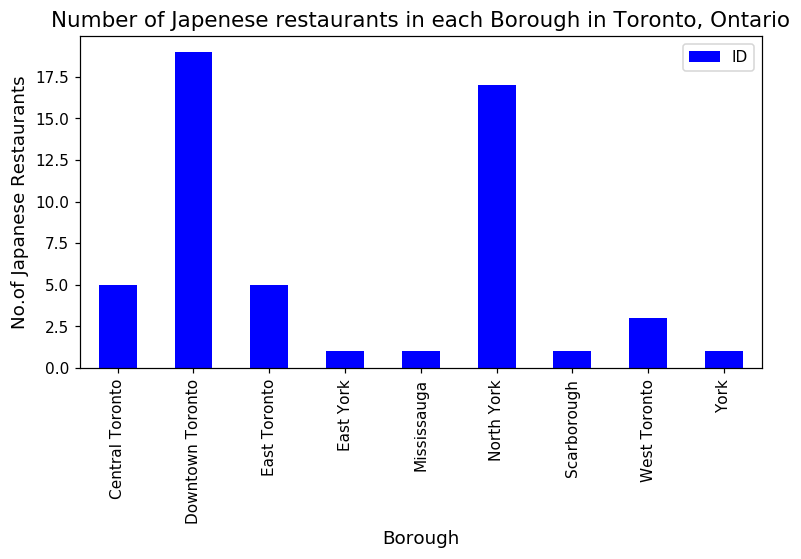

In [37]:
# column chart 
plt.figure(figsize=(8,4), dpi = 110)
# title
plt.title('Number of Japenese restaurants in each Borough in Toronto, Ontario', fontsize=14)
#label x-axis
plt.xlabel('Borough', fontsize = 12)
#label  y-axis
plt.ylabel('No.of Japanese Restaurants', fontsize=12)
#bar plot
jr_toronto_sort.groupby('Borough')['ID'].count().plot(kind='bar', color='blue')
#ticks
#plt.tick_params(axis='y', length=5)

#legend
plt.legend()
#displays the plot
plt.show()

#### Percentage of Total number of Japanese for each Borough represented by a pie chart

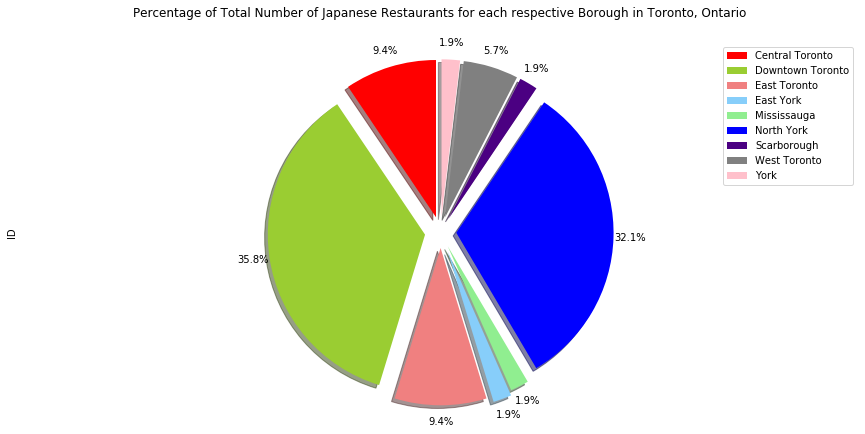

In [38]:
colors_list = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'blue','indigo', 'gray','pink']
explode_list = [0.1, 0.1, 0.1, 0.13, 0.1, 0.1, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

jr_toronto_sort.groupby('Borough')['ID'].count().plot(kind='pie',
                            figsize=(15, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.105,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 5% to match pctdistance
plt.title('Percentage of Total Number of Japanese Restaurants for each respective Borough in Toronto, Ontario', y=1.05) 
plt.axis('equal')

# add legend
#groupby_jborough=ngeod.groupby('Borough')['Neighborhood'].count()
plt.legend(labels=jr_toronto_sort.Borough.unique(), loc='upper right') 

plt.show()

From the venues search results, **Downtown Toronto** has the highest number of the Japanese restaurants with nineteen (19) restaurants, followed by **North York** with seventeen (17). 

In terms of percentage, Downtown Toronto has the largest share of Japanese restaurants with 35.8%, followed by North York at 32.1%. Both boroughs account for almost two-thirds of the total number of Japanese restaurants in Toronto. 

It was also observed that Scarborough has only one (1) Japanese restaurant while Etobicoke has none (0), despite Scarborough having the third highest number of neighborhoods (17) behind North York (24) and Downtown Toronto (19) while Etobicoke ranks fourth with twelve (12) neighborhoods.


#### Overlay of Japanese restaurant locations based on latitude and longitude values for map visualization

In [39]:
#create map of Japanese Restaurant locations using latitude and longitude values
map_jr_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(jr_toronto_sort['Latitude'], jr_toronto_sort['Longitude'], jr_toronto_sort['Borough'], jr_toronto_sort['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        ).add_to(map_jr_toronto)  
    
map_jr_toronto

### 3.4 Venue details search using Foursquare API

Foursquare API premium search is utilized to perform venue details search to retrieve venue details information, such as **ratings**, **number of likes**, **number of tips** and **price tiers** based on the id of each Japanese restaurant, retrieved from the previous venues search. 

#### Define function for venue details search based on venue id using Foursquare API

In [40]:
def get_venue_details(venue_id):
        
    CLIENT_ID ='3V1UGCG3TRVYGV0UCAYAHS0C1WYC5T22SGZE1SVKITR3FE5I' # your Foursquare ID
    CLIENT_SECRET ='OUZK24RTZJCY3K2GL5ZZESMVXLDWBDICE3JUWIN24MI1RMG5' # your Foursquare Secret
    VERSION = '20200401' # Foursquare API version

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_price=venue_data['price']['tier']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips,venue_price])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips','PriceTier']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Perform venue details search on number of likes, rating, number of tips and price tier based on venue id

In [41]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips','PriceTier','Longitude', 'Latitude']
jr_toronto_pr=pd.DataFrame(columns=column_names)
count=1


for row in jr_toronto_sort.values.tolist():
    Borough,Neighborhood,ID,Name, Latitude, Longitude=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips,price=venue_details.values.tolist()[0]
        
    except IndexError:
        print('No data available for ',Name,':',count,'/',len(jr_toronto_sort))
    
    jr_toronto_pr = jr_toronto_pr.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips'   : tips,
                                                'PriceTier' : price,
                                                'Latitude' : Latitude,
                                                'Longitude' : Longitude
                                          
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips  PriceTier
0  589f58fbd0bb3e25a8e5a88a  Rolltation     13     7.3     4          2
                         ID            Name  Likes  Rating  Tips  PriceTier
0  51ce2935498e66d5290f45c9  Sake Bar Kushi     29     7.4    14          2
                         ID                   Name  Likes  Rating  Tips  \
0  4b69b8ddf964a52000b02be3  Suki Japanese Cuisine      6     6.6    12   

   PriceTier  
0          2  
                         ID Name  Likes  Rating  Tips  PriceTier
0  4b107e81f964a520b07123e3  EDO     11     7.3     9          3
                         ID    Name  Likes  Rating  Tips  PriceTier
0  59f7bad335811b13a241e498  Gyubee     15     7.6     5          2
                         ID                      Name  Likes  Rating  Tips  \
0  4ae73054f964a5203ca921e3  Ki Modern Japanese + Bar     93     7.7    60   

   PriceTier  
0          3  
                         ID  Name  Likes  Rating  Tips  PriceTier
0  5

#### Display dataframe which contains the retrieved venue details 

In [71]:
jr_toronto_pr

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,13,7.3,4,2,-79.390197,43.712751
1,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,29,7.4,14,2,-79.411307,43.696948
2,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,6,6.6,12,2,-79.383160,43.689574
3,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,11,7.3,9,3,-79.416936,43.711695
4,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,15,7.6,5,2,-79.405678,43.672710
5,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,93,7.7,60,3,-79.373306,43.644771
6,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,142,9.0,47,2,-79.373306,43.644771
7,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,104,8.0,66,2,-79.387383,43.657952
8,Downtown Toronto,Christie,5317b12e11d2ed4e5d1b13ef,KINTORI YAKITORI,23,7.0,9,2,-79.422564,43.669542
9,Downtown Toronto,Christie,5884fa852f91cb3bc7e8ae95,Japanhako,10,7.0,4,2,-79.422564,43.669542


#### Save the results of the venue details search to file in CSV format

In [42]:
jr_toronto_pr.to_csv('Japanese_restaurants_in_Toronto_premium_info.csv', index=False)

#### Read back the CSV file

In [43]:
jr_pr_duplicate_chk=pd.read_csv('Japanese_restaurants_in_Toronto_premium_info.csv')

#### Check for duplicates by id count

In [44]:
jr_pr_duplicate_chk.groupby('ID')['Name'].count()

ID
4ad4c05df964a52048f620e3    1
4ad4c061f964a520abf720e3    1
4ad9f607f964a520691c21e3    1
4ae73054f964a5203ca921e3    1
4aec790bf964a5208fc721e3    1
4afa1f33f964a520e91622e3    1
4afc0e14f964a520a31f22e3    1
4aff4c2df964a520103722e3    1
4b107e81f964a520b07123e3    1
4b2bd898f964a52042bc24e3    1
4b2eb236f964a5202de524e3    1
4b36ac26f964a520623a25e3    1
4b50f565f964a5209b3a27e3    1
4b639286f964a5203c842ae3    1
4b69b8ddf964a52000b02be3    1
4bc895eeaf07a5935528812d    2
4bd5bd1a29eb9c7434ce93e1    1
4c10317981e976b075d10eeb    1
4c193c77838020a1e768e561    1
4c296a65e19720a11990f958    1
4c76920adb52b1f7a0c97bdc    1
4cec56edb80da09371e51b00    2
4fc6d475e4b0785353957fe7    1
4fca732be4b07c8e3e198c27    1
503fb59ce4b050691ba405a3    1
5077025ce4b05aefca37d9f9    1
50cc21c37ab4d9c0594b6994    1
50e8b903e4b04fa56858ecfe    1
51049684e4b06b57cac4e3e8    1
51ce2935498e66d5290f45c9    1
5317b12e11d2ed4e5d1b13ef    1
53365b04498e1331002e4d2c    1
5362c366498e602fbe1db395    1
53bafb4

In [45]:
jr_pr_duplicate_chk.shape

(53, 10)

This dataframe contains 53 rows and 10 columns

#### Remove duplicates by keeping the first record and dropping the rest of duplicates

In [47]:
jr_pr_duplicate_chk.drop_duplicates(subset ="ID",keep='first', inplace = True)
jr_pr_duplicate_chk.shape

(50, 10)

This dataframe contains 50 rows and 10 columns. That means 4 rows of duplicates have been removed.

#### Perform check to ensure no more duplicates

In [48]:
jr_pr_duplicate_chk.groupby('ID')['Name'].count()

ID
4ad4c05df964a52048f620e3    1
4ad4c061f964a520abf720e3    1
4ad9f607f964a520691c21e3    1
4ae73054f964a5203ca921e3    1
4aec790bf964a5208fc721e3    1
4afa1f33f964a520e91622e3    1
4afc0e14f964a520a31f22e3    1
4aff4c2df964a520103722e3    1
4b107e81f964a520b07123e3    1
4b2bd898f964a52042bc24e3    1
4b2eb236f964a5202de524e3    1
4b36ac26f964a520623a25e3    1
4b50f565f964a5209b3a27e3    1
4b639286f964a5203c842ae3    1
4b69b8ddf964a52000b02be3    1
4bc895eeaf07a5935528812d    1
4bd5bd1a29eb9c7434ce93e1    1
4c10317981e976b075d10eeb    1
4c193c77838020a1e768e561    1
4c296a65e19720a11990f958    1
4c76920adb52b1f7a0c97bdc    1
4cec56edb80da09371e51b00    1
4fc6d475e4b0785353957fe7    1
4fca732be4b07c8e3e198c27    1
503fb59ce4b050691ba405a3    1
5077025ce4b05aefca37d9f9    1
50cc21c37ab4d9c0594b6994    1
50e8b903e4b04fa56858ecfe    1
51049684e4b06b57cac4e3e8    1
51ce2935498e66d5290f45c9    1
5317b12e11d2ed4e5d1b13ef    1
53365b04498e1331002e4d2c    1
5362c366498e602fbe1db395    1
53bafb4

#### Save the final list of Japanese restaurants to file in CSV format

In [49]:
jr_pr_duplicate_chk.to_csv('Japanese_restaurants_in_Toronto_premium_final.csv', index=False)

#### Determine the number of Japanese restaurants for each Borough from the final list sorted in descending order

In [50]:
jrf_count=jr_pr_duplicate_chk.groupby('Borough')['ID'].count() \
         .reset_index(name='Japanese Restaurant Count') \
         .sort_values(['Japanese Restaurant Count'], ascending=False)
jrf_count

,Borough,Japanese Restaurant Count
1,Downtown Toronto,19
4,North York,16
0,Central Toronto,5
2,East Toronto,5
5,West Toronto,3
3,Mississauga,1
6,York,1


#### Display the final list of the Japanese restaurants

In [52]:
jr_toronto_pr_sort=jr_pr_duplicate_chk.sort_values(['Borough','Neighborhood','Name','Rating','Likes','Tips'], ascending=True).reset_index(drop=True)
jr_toronto_pr_sort

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,13,7.3,4,2,-79.390197,43.712751
1,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,29,7.4,14,2,-79.411307,43.696948
2,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,6,6.6,12,2,-79.383160,43.689574
3,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,11,7.3,9,3,-79.416936,43.711695
4,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,15,7.6,5,2,-79.405678,43.672710
5,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,93,7.7,60,3,-79.373306,43.644771
6,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,142,9.0,47,2,-79.373306,43.644771
7,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,104,8.0,66,2,-79.387383,43.657952
8,Downtown Toronto,Christie,5884fa852f91cb3bc7e8ae95,Japanhako,10,7.0,4,2,-79.422564,43.669542
9,Downtown Toronto,Christie,5317b12e11d2ed4e5d1b13ef,KINTORI YAKITORI,23,7.0,9,2,-79.422564,43.669542


### 3.5 K-means clustering algorithm

#### 3.5.1 Introduction to K-means clustering

K-means clustering algorithm is one of the unsupervised machine learning techniques commonly used in data science projects. Unsupervised learning draws inferences from datasets consisting of input data without any labeled responses. The objective of K-means is to group similar data points together and to unravel underlying patterns. To achieve this objective, a fixed number of clusters, k, needs to be defined in a dataset.  A cluster refers to a grouping of aggregated data points that have certain similarities. Each cluster has a centroid or center point. 

The K-means algorithm starts with randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative calculations to optimize the positions of the centroids until those centroids have stabilized where there is no change in their values  or until the defined number of iterations has been achieved.


#### 3.5.2 Application of K-means algorithm

The decision to use K-means clustering to rank the Japanese restaurants is based on several strengths of this algorithm as listed below:-
    
a.	Relatively fast and easy to implement

b.	Guarantees convergence

c.	Able to group datapoints similar to each other

d.	Unravels underlying trends or patterns

e.	Easier outlier detection 

For the selection of k, the number of clusters, there is no definitive hard rule to determine the optimum k. In this study, k=6 was chosen as a reasonable number of clusters to reduce the complexity during interpretation and ranking of the results.

To define the input dataset for K-means clustering, from the list of 50 Japanese restaurants, only 3 features were selected – number of likes, rating and number of tips. Price tier was dropped because it was not related to customers’ sentiment.

#### Examine the datatype for each column in the dataframe

In [81]:
jr_toronto_pr_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     int64  
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     int64  
 7   PriceTier     50 non-null     int64  
 8   Longitude     50 non-null     float64
 9   Latitude      50 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.0+ KB


#### Change the datatype for Likes, PriceTier and Tips to integer

In [53]:
jr_toronto_pr_sort["Likes"]=jr_toronto_pr_sort.Likes.astype(int)
jr_toronto_pr_sort["PriceTier"]=jr_toronto_pr_sort.PriceTier.astype(int)
jr_toronto_pr_sort["Tips"]=jr_toronto_pr_sort.Tips.astype(int)

In [54]:
jr_toronto_pr_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     int32  
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     int32  
 7   PriceTier     50 non-null     int32  
 8   Longitude     50 non-null     float64
 9   Latitude      50 non-null     float64
dtypes: float64(3), int32(3), object(4)
memory usage: 3.4+ KB


#### Dropping columns: Borough, Neighborhood, ID, Name, Longitude & Latitude from the dataframe

In [55]:
jr_clusters=jr_toronto_pr_sort.copy()

In [56]:
jr_clusters.drop(columns=['Borough', 'Neighborhood', 'ID', 'Name', 'Longitude', 'Latitude','PriceTier'], inplace=True)

#### Preparing input data (Likes, Rating and Tips) for K-means clustering

In [57]:
jr_clusters

,Likes,Rating,Tips
0,13,7.3,4
1,29,7.4,14
2,6,6.6,12
3,11,7.3,9
4,15,7.6,5
5,93,7.7,60
6,142,9.0,47
7,104,8.0,66
8,10,7.0,4
9,23,7.0,9


#### Preparing a new dataframe to merge the k-means clustering results

In [58]:
jr_kmeans_f=jr_toronto_pr_sort.copy()

In [59]:
jr_kmeans_f.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,13,7.3,4,2,-79.390197,43.712751
1,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,29,7.4,14,2,-79.411307,43.696948
2,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,6,6.6,12,2,-79.383160,43.689574
3,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,11,7.3,9,3,-79.416936,43.711695
4,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,15,7.6,5,2,-79.405678,43.672710


#### Running K-means clustering, with k=6

In [60]:
# set number of clusters
kclusters = 6



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jr_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 5, 0, 0, 0, 2, 4, 2, 0, 5])

## 4.0 Results <a name="results"></a>

### 4.1 Analysis of Results

The results of the K-means clustering (k=6) which produced 6 different clusters are analyzed. 

#### Overlay K-means clustering results on the map 

In [61]:
jr_kmeans_f.insert(0, 'Cluster Labels', kmeans.labels_)

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jr_kmeans_f['Latitude'],jr_kmeans_f['Longitude'], jr_kmeans_f['Neighborhood'], jr_kmeans_f['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Merge Cluster Labels into the dataframe

In [65]:
jr_kmeans_f

,Cluster Labels,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,13,7.3,4,2,-79.390197,43.712751
1,5,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,29,7.4,14,2,-79.411307,43.696948
2,0,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,6,6.6,12,2,-79.383160,43.689574
3,0,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,11,7.3,9,3,-79.416936,43.711695
4,0,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,15,7.6,5,2,-79.405678,43.672710
5,2,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,93,7.7,60,3,-79.373306,43.644771
6,4,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,142,9.0,47,2,-79.373306,43.644771
7,2,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,104,8.0,66,2,-79.387383,43.657952
8,0,Downtown Toronto,Christie,5884fa852f91cb3bc7e8ae95,Japanhako,10,7.0,4,2,-79.422564,43.669542
9,5,Downtown Toronto,Christie,5317b12e11d2ed4e5d1b13ef,KINTORI YAKITORI,23,7.0,9,2,-79.422564,43.669542


#### Examine Cluster 1 

In [66]:
cluster1=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 0, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster1

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,Central Toronto,Davisville North,589f58fbd0bb3e25a8e5a88a,Rolltation,13,7.3,4,2,-79.390197,43.712751
2,Central Toronto,"Moore Park , Summerhill East",4b69b8ddf964a52000b02be3,Suki Japanese Cuisine,6,6.6,12,2,-79.383160,43.689574
3,Central Toronto,Roselawn,4b107e81f964a520b07123e3,EDO,11,7.3,9,3,-79.416936,43.711695
4,Central Toronto,"The Annex , North Midtown , Yorkville",59f7bad335811b13a241e498,Gyubee,15,7.6,5,2,-79.405678,43.672710
8,Downtown Toronto,Christie,5884fa852f91cb3bc7e8ae95,Japanhako,10,7.0,4,2,-79.422564,43.669542
11,Downtown Toronto,Church and Wellesley,59c54d4f2d2fd97564d4cfc8,Onnki Donburi,13,7.6,3,2,-79.383160,43.665860
13,Downtown Toronto,"Garden District , Ryerson",599cb69eb5461876d54ab713,Katsuya,14,7.4,3,2,-79.378937,43.657162
15,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",5a2c772450a6f0229d83d923,Akira Back,9,8.4,6,4,-79.381752,43.640816
20,Downtown Toronto,Rosedale,4b50f565f964a5209b3a27e3,Nijo Japanese Restaurant,13,6.6,11,2,-79.377529,43.679563
21,Downtown Toronto,St. James Town,5a4fdf56772fbc5e9fa73c7f,Chotto Matte,11,8.0,2,2,-79.375418,43.651494


In [67]:
cluster1.shape

(28, 10)

#### Examine Cluster 2

In [68]:
cluster2=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 1, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster2

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
17,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,387,8.3,223,2,-79.389494,43.662301


In [69]:
cluster2.shape

(1, 10)

#### Examine Cluster 3

In [70]:
cluster3=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 2, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster3

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
5,Downtown Toronto,Berczy Park,4ae73054f964a5203ca921e3,Ki Modern Japanese + Bar,93,7.7,60,3,-79.373306,43.644771
7,Downtown Toronto,Central Bay Street,4ad9f607f964a520691c21e3,Manpuku まんぷく,104,8.0,66,2,-79.387383,43.657952
22,Downtown Toronto,"St. James Town , Cabbagetown",50cc21c37ab4d9c0594b6994,Kingyo Toronto,113,8.7,54,2,-79.367675,43.667967


In [71]:
cluster3.shape

(3, 10)

#### Examine Cluster 4

In [72]:
cluster4=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 3, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster4

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
18,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4ad4c061f964a520abf720e3,Tokyo Grill,35,7.7,29,1,-79.389494,43.662301
19,Downtown Toronto,"Richmond , Adelaide , King",4afa1f33f964a520e91622e3,Fune Japanese Restaurant,53,8.0,27,2,-79.384568,43.650571
34,North York,Don Mills,4aec790bf964a5208fc721e3,Memories of Japan,35,6.7,32,2,-79.340923,43.725900
42,North York,Willowdale,4fc6d475e4b0785353957fe7,Nomé Izakaya,65,6.7,31,2,-79.408493,43.770120
43,North York,Willowdale,4c76920adb52b1f7a0c97bdc,Sushi One,43,7.3,35,3,-79.408493,43.770120


In [73]:
cluster4.shape

(5, 10)

#### Examine Cluster 5

In [74]:
cluster5=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 4, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster5

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
6,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,142,9.0,47,2,-79.373306,43.644771
14,Downtown Toronto,"Garden District , Ryerson",50e8b903e4b04fa56858ecfe,Zakkushi ざっ串,125,8.5,34,2,-79.378937,43.657162


In [75]:
cluster5.shape

(2, 10)

#### Examine Cluster 6

In [76]:
cluster6=jr_kmeans_f.loc[jr_kmeans_f['Cluster Labels'] == 5, jr_kmeans_f.columns[[1] + list(range(2, jr_kmeans_f.shape[1]))]]
cluster6

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
1,Central Toronto,Forest Hill North & West,51ce2935498e66d5290f45c9,Sake Bar Kushi,29,7.4,14,2,-79.411307,43.696948
9,Downtown Toronto,Christie,5317b12e11d2ed4e5d1b13ef,KINTORI YAKITORI,23,7.0,9,2,-79.422564,43.669542
10,Downtown Toronto,Church and Wellesley,4c193c77838020a1e768e561,Kawa Sushi,27,7.8,13,2,-79.383160,43.665860
12,Downtown Toronto,"Garden District , Ryerson",574ad72238fa943556d93b8e,Gyu-Kaku Japanese BBQ,42,8.6,11,2,-79.378937,43.657162
16,Downtown Toronto,"Kensington Market , Chinatown , Grange Park",503fb59ce4b050691ba405a3,Gushi,21,7.5,9,2,-79.400049,43.653206
23,Downtown Toronto,"University of Toronto , Harbord",5362c366498e602fbe1db395,Yasu,46,8.7,12,2,-79.400049,43.662696
29,Mississauga,Canada Post Gateway Processing Centre,4bc895eeaf07a5935528812d,Masamune,22,8.1,15,2,-79.615819,43.636966
33,North York,Don Mills,53bafb4f498eb927faa3cd9e,Matsuda Japanese Cuisine & Teppanyaki,37,7.2,10,2,-79.352188,43.745906
46,West Toronto,"Brockton , Parkdale Village , Exhibition Place",5792a2e4cd10f4e248ad94e2,Guu Izakaya,29,8.6,2,2,-79.428191,43.636847
47,West Toronto,"Little Portugal , Trinity",51049684e4b06b57cac4e3e8,Bazara,28,8.2,15,2,-79.419750,43.647927


In [77]:
cluster6.shape

(11, 10)

#### Analysis of the K-means clustering results

From the results, each one of the six (6) clusters was analyzed with observations described as below:-
    
a.	Cluster 1: This cluster by far the largest amongst the 6 clusters, has 28 restaurants, with locations in Central Toronto, Downtown Toronto, East Toronto, North York, and York. This cluster represents more than half of the total number (50) of restaurants on the final list. The maximum number of likes is 16 and minimum is 3, while the maximum number of tips is 14 and the minimum is 1. The rating ranges from 6.0 to 8.8.
    
b.	Cluster 2: This cluster only has 1 restaurant, located in Downtown Toronto. This restaurant has apparently the highest number of likes that is 387 and the highest number of tips which stands at 223. The rating for this restaurant is 8.3.
    
c.	Cluster 3: This cluster has 3 restaurants, all located in Downtown Toronto with the number of likes ranges from 93 to 113, while number of tips is from 54 to 60. The rating ranges from 7.7 to 8.7.
    
d.	Cluster 4: This cluster has 5 restaurants, located in Downtown Toronto and North York, with the number of likes ranges from 45 to 65, while the number of tips is from 27 to 35. The rating ranges from 6.7 to 8.0.
    
e.	Cluster 5: This cluster has only 2 restaurants, both are in Downtown Toronto with the numbers of likes are 142 and 125 respectively, while the numbers of tips are 47 and 34 respectively. The ratings are 9.0 and 8.5 respectively.
    
f.	Cluster 6: The last cluster has 11 restaurants, located in various locations - Central Toronto, Downtown Toronto, West Toronto, North York, and Mississauga with numbers of likes from 21 to 48, while the number of tips ranges from 9 to 15. Ratings are from 7.0 to 9.0.
    


#### 4.2 Interpretation of Results and Ranking

From the analysis on the 6 different clusters, the results of the K-means clustering were interpreted and ranked as the following:-
    
a.	The only restaurant in **Cluster 2**, has apparently the highest number of likes (387) and the highest number of tips (223). The rating of this restaurant is 8.3. Undoubtedly, this gives indication that this restaurant is the most popular in Toronto and should be ranked the top of the list. This restaurant is in Downtown Toronto.

b.	The cluster in which the restaurants have the second and third number of likes (142 & 125 respectively) is **Cluster 5**. Though the number of tips is 47 and 34 respectively, however the rating scores are high: 9.0 and 8.5 respectively. This cluster of 2 restaurants was ranked second on the list, below the Cluster 2 restaurant. Both restaurants are in Downtown Toronto.
    
c.	The cluster that was ranked third on the list, behind Cluster 5 is **Cluster 3**. It has 3 restaurants, all located in Downtown Toronto with the number of likes ranges from 93 to 113, which are lower than those of Cluster 5 while number of tips ranges from 54 to 60, which are slightly higher than those of Cluster 5. The rating ranges from 7.7 to 8.7, which are lower than Cluster 5 in general.

d.	 The cluster that was ranked fourth on the list is **Cluster 4** which has 5 restaurants, with the number of likes ranges from 45 to 65, while the number of tips is from 27 to 35. The rating ranges from 6.7 to 8.0. The restaurants are in Downtown Toronto and North York.

e.	Next on the list, **Cluster 6** was ranked fifth, which has 11 restaurants found in various locations - Central Toronto, Downtown Toronto, West Toronto, North York, and Mississauga with numbers of likes from 21 to 48, while the number of tips ranges from 9 to 15. Ratings are from 7.0 to 9.0.

f.	Bottom on the list is **Cluster 1** that was ranked sixth. This cluster has 28 restaurants in various locations including Central Toronto, Downtown Toronto, East Toronto, North York, and York. The maximum number of likes is 16 and the minimum is 3, while the maximum number of tips is 14 and the minimum is 1. The rating ranges from 6.0 to 8.8. Cluster 1 has the lowest number of likes and the lowest number of tips amongst the six clusters.



#### 4.3 Selecting the top 3 Japanese resstaurants

The restaurants from **Cluster 2** and **Cluster 5**, which are the top two clusters from the ranking list were selected to be the top 3 Japanese restaurants in Toronto. 

The names of these restaurants are – **Kinka Izakaya Original** from **Cluster 2**, **Miku** and **Zakkushi** are from **Cluster 5**. These restaurants are all located in Downtown Toronto. Further venue details search was performed using Foursquare API premium search to retrieve details such as Address, Phone Number, Opening Hours and actual location coordinates in Latitude and Longitude for the purpose of map visualization.

#### Create dataframe for the top 3 Japanese restaurants

In [ ]:
top_jr_toronto=cluster2.copy()

In [79]:
top3_jr_toronto=top_jr_toronto.append(cluster5, ignore_index=True)

In [80]:
top3_jr_toronto

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,PriceTier,Longitude,Latitude
0,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,387,8.3,223,2,-79.389494,43.662301
1,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,142,9.0,47,2,-79.373306,43.644771
2,Downtown Toronto,"Garden District , Ryerson",50e8b903e4b04fa56858ecfe,Zakkushi ざっ串,125,8.5,34,2,-79.378937,43.657162


#### Define function to get venue details: Address, Phone Number, Opening Hours & Actual Location coordinates

In [81]:
def get_venue_details1(venue_id):
        
    CLIENT_ID ='3V1UGCG3TRVYGV0UCAYAHS0C1WYC5T22SGZE1SVKITR3FE5I' # your Foursquare ID
    CLIENT_SECRET ='OUZK24RTZJCY3K2GL5ZZESMVXLDWBDICE3JUWIN24MI1RMG5' # your Foursquare Secret
    VERSION = '20200401' # Foursquare API version

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_address=venue_data['location']['address']
        venue_lat=venue_data['location']['lat']
        venue_lng=venue_data['location']['lng']
        venue_contact=venue_data['contact']['phone']
        venue_hours=venue_data['hours']['status']
        venue_details.append([venue_id,venue_name,venue_address, venue_lat, venue_lng, venue_contact, venue_hours])
    except KeyError:
        pass
        
    column_names=['ID','Name','Address','Latitude', 'Longitude','PhoneNumber','Hours']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Retrieve venue details from Foursquare

In [82]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Address','PhoneNumber','Hours','Latitude', 'Longitude']
top3_jr_pr=pd.DataFrame(columns=column_names)
count=1


for row in top3_jr_toronto.values.tolist():
    Borough,Neighborhood,ID,Name, Likes, Rating, Tips, PriceTier, Latitude, Longitude=row
    try:
        venue_details=get_venue_details1(ID)
        print(venue_details)
        id,name,address,lat,lng,contact, hours=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for ',Name)
        
      #  id,name,likes,rating,price=[0]*5
    # print('(',count,'/',len(jr_toronto_sort),')',done')
    top3_jr_pr = top3_jr_pr.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                              'Address':address,
                                             'Latitude':lat,
                                             'Longitude':lng, 
                                                'Name' : name,
                                          'PhoneNumber': contact,
                                               'Hours': hours                                       
                                               }, ignore_index=True)
    count+=1

                         ID                    Name        Address   Latitude  \
0  4b2bd898f964a52042bc24e3  Kinka Izakaya Original  398 Church St  43.660596   

   Longitude PhoneNumber                Hours  
0 -79.378891  4169770999  Open until Midnight  
                         ID  Name    Address   Latitude  Longitude  \
0  56201ed4498e7f700c462170  Miku  10 Bay St  43.641374 -79.377531   

  PhoneNumber                Hours  
0  6473477347  Open until 10:00 PM  
                         ID          Name          Address   Latitude  \
0  50e8b903e4b04fa56858ecfe  Zakkushi ざっ串  193 Carlton St.  43.663618   

   Longitude PhoneNumber               Hours  
0  -79.37067  6473529455  Open until 1:00 AM  


#### Dataframe displaying retrieved venue details for the top 3 restaurants 

In [83]:
top3_jr_pr

,Borough,Neighborhood,ID,Name,Address,PhoneNumber,Hours,Latitude,Longitude
0,Downtown Toronto,"Queen's Park , Ontario Provincial Government",4b2bd898f964a52042bc24e3,Kinka Izakaya Original,398 Church St,4169770999,Open until Midnight,43.660596,-79.378891
1,Downtown Toronto,Berczy Park,56201ed4498e7f700c462170,Miku,10 Bay St,6473477347,Open until 10:00 PM,43.641374,-79.377531
2,Downtown Toronto,"Garden District , Ryerson",50e8b903e4b04fa56858ecfe,Zakkushi ざっ串,193 Carlton St.,6473529455,Open until 1:00 AM,43.663618,-79.370670


#### Ovelay of the top 3 Japanese restaurant on map for visualization

In [84]:
#create map of Toronto using latitude and longitude values
map_top3_jr_toronto = folium.Map(location=[latitude, longitude], zoom_start=13.5)

# add markers to map and labels of the 3 Japanese Restaurants
for lat, lng, name, address in zip(top3_jr_pr['Latitude'], top3_jr_pr['Longitude'],top3_jr_pr['Name'], top3_jr_pr['Address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
       radius=9,
        popup=label,
       color='red',
       fill=True,
       fill_color='#3186cc',
        fill_opacity=0.5,
        ).add_to(map_top3_jr_toronto)  
    
map_top3_jr_toronto

## 5.0 Discussion <a name="discussion"></a>

### 5.1 Observations

From the analysis, interpretation and ranking of the K-means clustering results, several observations were made and noted. These observations are discussed as below:-
    
a.	K-means clustering algorithm is an effective technique that is able to  distinguish the top Japanese restaurants from the rest of the group based on the quantitative customers’ sentiments such as number of likes, number of tips and ranking as input data. 

b.	Cluster 1 has the lowest number of likes and the lowest number of tips amongst the six clusters amongst the 6 different clusters but it is the largest cluster which accounts more than half of the total number of Japanese restaurants on the final list. This is indicative that these restaurants are the least popular amongst customers. Customers in Toronto seem to be quite selective when choosing their preferred choice of Japanese restaurants.

c.	All the top 3 Japanese restaurants have Price Tier of 2 which is on the less expensive side of the scale. In Toronto, less expensive Japanese restaurants seem to be preferred by customers, in general.   

d.	The Foursquare API premium search does not have complete venue details data in its database. When performing venue details search for this study, 3 out of the initial list of 53 Japanese restaurants were found not to have the required venue details data and as a result, those 3 restaurants had to be dropped from the list of Japanese restaurants to be used as input for K-means clustering. With a small dataset size of 50 restaurants, even 3 restaurants could affect the outcome of the results. Ideally, after data cleaning process, all the 53 restaurants should have been maintained to be used as input for K-means clustering.


### 5.2 Recommendations

From this study, several recommendations for further improvements are discussed as below:-
    
a.	The workflow implemented in this study which utilized K-means clustering algorithm can be replicated to be used in other similar data science projects, for example – determining the top Italian, Korean, Indian, Indonesian restaurants et cetera in certain cities of interest.

b.	An alternative to Foursquare API such as Google Map API should be explored although pricing could be a drawback. This is because Foursquare may not have the complete information or data on the venue details which may affect the results of the study if the dataset size is small.

c.	The lack of free geospatial data in terms of Latitude and Longitude in relation to Canadian postal codes may be a challenge for the projects which crucially need those data to perform venues search or any geospatial analysis work related to Canada. In view of this, Canadian government agencies or universities should make available this type of data in the public domain for free.


## 6.0 Conclusion <a name="conclusion"></a>

The results of this study which utilized the **K-means clustering algorithm**, have successfully achieved the objective to provide reliable and well-researched information to the target group comprising business travellers, tourists and short-term visitors to Toronto in addressing their requirements as below:-
    
a.	List of Japanese restaurants in Toronto: A final list of **50 Japanese restaurants** which contains venue details such as number of likes, number of tips, ratings, and price tiers.
    
b.	Boroughs in Toronto that have a significant presence of Japanese restaurants and the borough that has the highest number of Japanese restaurants: **Downtown Toronto** has the highest number of Japanese restaurants (19) followed by **North York** (16). Travelers can choose their hotel accommodation in these 2 boroughs for the proximity to a wide selection of Japanese restaurants.
    
c.	Ranking of the Japanese restaurants in Toronto based on customers’ sentiments: Ranking exercise was done to rank 6 different clusters from the results of K-means clustering. **Cluster 2** with 1 restaurant was ranked top, **Cluster 5** with 2 restaurants was ranked second, followed by **Cluster 3** with 3 restaurants. **Cluster 4** with 5 restaurants was ranked fourth, followed by **Cluster 6** with 11 restaurants. **Cluster 1** with 28 restaurants was ranked bottom of the list.
    
d.	Recommendation on the top 3 Japanese restaurants in Toronto: The 3 top Japanese restaurants identified are from **Cluster 2** and **Cluster 5**. These restaurants are - **Kinka Izakaya Original**, **Miku**, and **Zakkushi**, which are all in Downtown Toronto.
